In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anuradhay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
import pandas as pd
df=pd.read_excel('test-lstm(garments,auto).xlsx')

In [50]:
df['COMMODITY DESCRIPTION'][3]

'garments / rmg\t'

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35083 entries, 0 to 35082
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   COMMODITY DESCRIPTION  35083 non-null  object        
 1   SEGMENT CODE           35083 non-null  int64         
 2   JOB NO                 35083 non-null  int64         
 3   SUBJOB NO              35083 non-null  int64         
 4   JOB DATE               35083 non-null  datetime64[ns]
 5   MATCHED KEYWORDS       35083 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 1.6+ MB


In [52]:
df['MATCHED KEYWORDS'].value_counts()

MATCHED KEYWORDS
[['auto']]       23600
[['garment']]    11483
Name: count, dtype: int64

In [53]:
df['MATCHED KEYWORDS'].value_counts()

MATCHED KEYWORDS
[['auto']]       23600
[['garment']]    11483
Name: count, dtype: int64

In [54]:
import re
from nltk.corpus import stopwords  # Import the stopwords module
# REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;%]')
# BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
# STOPWORDS = set(stopwords.words('english'))


In [55]:
def clean_text_general(text):
    # Remove specific details using regular expressions
    text = re.sub(r"[A-Za-z0-9]+?(\d{2}|\d{4}).\d{2}.\d{2}(\n|$)", "", text)
    text = re.sub(r"[A-Za-z0-9]+?\s*:\s*.+?(\n|$)", "", text)
    text = re.sub(r"[A-Za-z0-9]+?\s+no\..+?(\n|$)", "", text)
    text = re.sub(r"\b[0-9]{2,}\b", "", text)
    text = re.sub(r"inv\s*no\s*:.*?(\n|$)", "", text)
    text = re.sub(r"inv\s*n0.*?(\n|$)", "", text)
    text = re.sub(r"inv\s*no.*?(\n|$)", "", text)
    text = re.sub(r"freight\s*collect", "", text)

    # Convert to lowercase
    text = text.lower()

    # Remove special characters and digits, keep only alphabetic characters, spaces, and punctuation
    text = re.sub(r"[^a-zA-Z\s\.,!?']", "", text)

    # Remove extra whitespaces
    text = re.sub(r"\s+", " ", text).strip()
    stop_words = set(stopwords.words("english"))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    text = " ".join(words)

    return text

In [56]:
df['COMMODITY DESCRIPTION'] = df['COMMODITY DESCRIPTION'].apply(clean_text_general)
# df['COMMODITY DESCRIPTION'] = df['COMMODITY DESCRIPTION'].str.replace('\d+', '')

In [57]:
df['COMMODITY DESCRIPTION'][1500]

'packagesmounted brake liningsautomotive brake partsinv'

In [58]:
from nltk.tokenize import word_tokenize


In [59]:
nltk.download('punkt')  # Download the necessary tokenizer data (only required once)
df['tokenized_text'] = df['COMMODITY DESCRIPTION'].apply(word_tokenize)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anuradhay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [60]:
df['tokenized_text']

0                                      [automotive, parts]
1                                 [automotive, components]
2        [box, movable, wall, palace, semi, automatic, ...
3                                          [garments, rmg]
4        [number, packages, kind, packages, six, hundre...
                               ...                        
35078                  [automotive, gears, various, types]
35079                       [automotive, battery, vah, hs]
35080    [total, box, onlyautomatic, rotichapati, makin...
35081        [automatic, rotichapati, making, machine, hs]
35082    [total, cartons, fifty, four, readymade, garme...
Name: tokenized_text, Length: 35083, dtype: object

In [61]:
tokenized_sequences = df['tokenized_text'].tolist()

# Find the maximum sequence length
max_seq_length = max(len(seq) for seq in tokenized_sequences)

# Pad sequences to the same length
padded_sequences = pad_sequences(tokenized_sequences, maxlen=max_seq_length, padding='post', truncating='post', value='', dtype=object)

# Update the DataFrame with padded sequences
df['padded_sequences'] = pd.Series(padded_sequences.tolist())

print(df)

                                   COMMODITY DESCRIPTION  SEGMENT CODE  \
0                                       automotive parts             5   
1                                  automotive components             5   
2      box movable wall palace semi automatic db og s...             5   
3                                           garments rmg             5   
4      number packages kind packages six hundred eigh...             1   
...                                                  ...           ...   
35078                     automotive gears various types             4   
35079                          automotive battery vah hs             5   
35080  total box onlyautomatic rotichapati making mac...             4   
35081            automatic rotichapati making machine hs             5   
35082  total cartons fifty four readymade garments.al...             4   

            JOB NO  SUBJOB NO   JOB DATE MATCHED KEYWORDS  \
0       9500301169          3 2020-01-02       [['

In [62]:
df.head()

,COMMODITY DESCRIPTION,SEGMENT CODE,JOB NO,SUBJOB NO,JOB DATE,MATCHED KEYWORDS,tokenized_text,padded_sequences
0,automotive parts,5,9500301169,3,2020-01-02,[['auto']],"[automotive, parts]","[automotive, parts, , , , , , , , , , , , , , ..."
1,automotive components,5,9500301169,10,2020-01-02,[['auto']],"[automotive, components]","[automotive, components, , , , , , , , , , , ,..."
2,box movable wall palace semi automatic db og s...,5,9500105209,4,2020-01-05,[['auto']],"[box, movable, wall, palace, semi, automatic, ...","[box, movable, wall, palace, semi, automatic, ..."
3,garments rmg,5,9500105198,1,2019-12-18,[['garment']],"[garments, rmg]","[garments, rmg, , , , , , , , , , , , , , , , ..."
4,number packages kind packages six hundred eigh...,1,9502001585,1,2019-12-23,[['garment']],"[number, packages, kind, packages, six, hundre...","[number, packages, kind, packages, six, hundre..."


In [63]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

In [64]:
# Encode the labels into numerical values
#label_encoder = LabelEncoder()
#df['encoded_label'] = label_encoder.fit_transform(df['MATCHED KEYWORDS'])

# Convert the numerical labels to one-hot vectors
y = pd.get_dummies(df['MATCHED KEYWORDS']).values

#y=df['encoded_label']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (28066, 264)
y_train shape: (28066, 2)
X_test shape: (7017, 264)
y_test shape: (7017, 2)


In [65]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Assuming you have the DataFrame named 'df' as shown in the question

# Step 1: Encode the labels into numerical values
label_encoder = LabelEncoder()
df['encoded_label'] = label_encoder.fit_transform(df['MATCHED KEYWORDS'])

# Step 2: Convert the numerical labels to one-hot vectors
onehot_encoder = OneHotEncoder(sparse=False)
y = onehot_encoder.fit_transform(df['encoded_label'].values.reshape(-1, 1))

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (28066, 264)
y_train shape: (28066, 2)
X_test shape: (7017, 264)
y_test shape: (7017, 2)


C:\Users\Anuradhay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [66]:
y_train


array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping


In [68]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D  # Import SpatialDropout1D

# Assuming you have the DataFrame named 'df' as shown in the question

# Step 1: Preprocess the data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['tokenized_text'])
vocab_size = len(tokenizer.word_index) + 1
encoded_sequences = tokenizer.texts_to_sequences(df['tokenized_text'])
padded_sequences = pad_sequences(encoded_sequences)

# Step 2: Prepare the target labels
labels = df['encoded_label']

# Step 3: Create the LSTM model with SpatialDropout1D layer
embedding_dim = 50  # You can choose the size of the embedding dimension
lstm_units = 64      # You can choose the number of LSTM units

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=padded_sequences.shape[1]))
model.add(SpatialDropout1D(0.2))  # Add SpatialDropout1D layer with dropout rate (e.g., 0.2)
model.add(LSTM(lstm_units))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification, for multi-class use softmax

# Step 4: Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Use categorical_crossentropy for multi-class

# Step 5: Train the model
model.fit(padded_sequences, labels, epochs=10, batch_size=32, validation_split=0.2)

# Step 6: Evaluate the model (optional)
loss, accuracy = model.evaluate(padded_sequences, labels)
print(f'Test accuracy: {accuracy:.4f}')


Epoch 1/10
878/878 [==============================] - 117s 131ms/step - loss: 0.1179 - accuracy: 0.9500 - val_loss: 0.0665 - val_accuracy: 0.9736
Epoch 2/10
878/878 [==============================] - 118s 134ms/step - loss: 0.0487 - accuracy: 0.9787 - val_loss: 0.0610 - val_accuracy: 0.9759
Epoch 3/10
878/878 [==============================] - 121s 138ms/step - loss: 0.0403 - accuracy: 0.9805 - val_loss: 0.0595 - val_accuracy: 0.9751
Epoch 4/10
878/878 [==============================] - 119s 135ms/step - loss: 0.0376 - accuracy: 0.9819 - val_loss: 0.0676 - val_accuracy: 0.9704
Epoch 5/10
878/878 [==============================] - 119s 135ms/step - loss: 0.0360 - accuracy: 0.9826 - val_loss: 0.0635 - val_accuracy: 0.9755
Epoch 6/10
878/878 [==============================] - 120s 137ms/step - loss: 0.0345 - accuracy: 0.9831 - val_loss: 0.0606 - val_accuracy: 0.9759
Epoch 7/10
878/878 [==============================] - 119s 136ms/step - loss: 0.0346 - accuracy: 0.9831 - val_loss: 0.0642 -

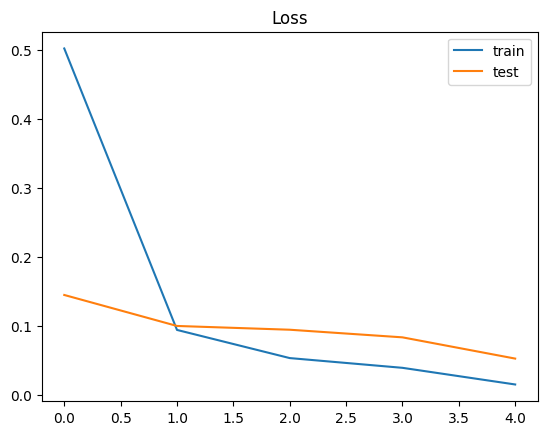

In [ ]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [76]:
txt = ["accessories for 100% exportoriented readymade  garmentsindustry12 packagesinvoice no. hiipl-19/266dt.29.11.19proforma invoice no.256dt.07.11.19sp # 721721 (p) - s   sp # 721721 (p) - lsb no: 8682846 dt: 03.12.2019gross wt: 108.00kgsnet wt: 90.000kgs"]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)

labels = ['garments','auto']
print(pred)
print(np.argmax(pred))
print(labels[np.argmax(pred)-1])

1/1 [==============================] - 0s 32ms/step
[[0.99890685]]
0
auto


In [72]:
# Assuming you have already trained and defined the 'model' and 'tokenizer'

new_description = ['1 box of movable wall palace 110 semi automatic 50 db og system  track trolley fg2  finishing mdf']

# Step 1: Preprocess the new description using the tokenizer
seq = tokenizer.texts_to_sequences(new_description)

# Step 2: Pad the tokenized sequence to have the same length as during training
#MAX_SEQUENCE_LENGTH = <your_max_sequence_length>  # Replace with the appropriate value used during training
padded = pad_sequences(seq, maxlen=max_seq_length)

# Step 3: Make predictions using the trained model
pred = model.predict(padded)

# Step 4: Map the predicted class index to the corresponding label
labels = ['garments','auto']
predicted_label = labels[np.argmax(pred)]

print(pred, predicted_label)


1/1 [==============================] - 0s 30ms/step
[[9.188616e-06]] garments
